<a href="https://colab.research.google.com/github/MatheusABomfim/ML_HTLV_HAM-TSP/blob/main/ML_MEST_HTLV%2BMBL2%2BCLINICAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anotações/lembretes:

*   Foi excluído os dados clínicos
(pois serão ainda extraído dos prontuários, classificando separadamente os oligossintomáticos, permitindo melhor avaliação da máquina)

*   Esse script é pautado no arquivo: "Pautado no ML Wine data set" com as devidas modificações

*   Utiliza somente um modelo avaliativo de aprendizado por máquina, será utilizado diversos no trabalho final do mestrado. Correspondendo o script atual um treinamento para o script elaborado em conjunto com pacífico (mais complexo

# Dicionário:
* Na coluna: MBL-550
  * HH = 0
  * HL = 1
  * LL = 2
  
* Na coluna: MBL-221
  * YY = 0
  * YX = 1
  * xx = 2

* Na coluna: MBL EXON
  * AO = 0
  * AA = 1
  * OO = 2

* Na coluna: SEXO
  * M = 0
  * F = 1

* Na coluna: HAM/TSP
 * Sem mielopatia = 0
 * HAM/TSP = 1


In [2]:
# Att Scikit-learn
!pip uninstall scikit-learn
!pip install scikit-learn

# Install shap package (não consta no google colab)
!pip install shap #Corrigir erro do shap

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 5.7 MB/s eta 0:00:00


In [3]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
#import shap

dados_iniciais_Vanessa = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML.csv')

#Ignoring flags
import warnings
warnings.filterwarnings('ignore')

# Importação e tratamento de dados:

In [4]:
# Import Data Frame
# Import initial file "dados_iniciais_Vanessa"
df = pd.read_table(dados_iniciais_Vanessa, sep=',')  # sep= parâmetro separador(;)
nome_arquivo = os.path.basename(dados_iniciais_Vanessa).split(".")  # obtem o nome do arquivo = os.path.basename(arquivo) e split obtém o nome em partes separadas por ponto
nome_arquivo = nome_arquivo[0]  # obtem o nome do arquivo sem a extensão
caminho_arquivo = os.path.dirname(dados_iniciais_Vanessa) #obtem o caminho do arquivo, sem o nome dele (arquivo)

In [5]:
# Evaluation of successful dataframe import
#print(df)
#df.dtypes
#df.head
print(df.columns)

Index(['NUM AMO', 'NOME', 'REGISTRO', 'SEXO', 'Idade 2018 (2019 AZUL)',
       'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'SINTOMAS',
       'ANO DE DIAGNOSTICO', 'SINT. DET.', 'Incontinência Urinária',
       'dor urinária', 'parestesia', 'Paresia', 'Hipereflexia',
       'Hipereflexia em MMII', 'Hiperatividade', 'fraqueza',
       'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência', 'Dor',
       'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose

**Criando diretório para armazenamento**

In [6]:
# Checking the directory
diretorio_name = caminho_arquivo + "/" + nome_arquivo  # cria o diretório a partir das variáveis acima de caminho e nome_arquivo
try:
    os.mkdir(diretorio_name)  # tenta criar o diretório
    print("Novo Diretório Criado! \n")
except FileExistsError:
    print("O diretório já existe!")
    print(diretorio_name)
    print("--> Verifique se ele está vazio, ou possui arquivos! \n")

# Dataframe format (rows, columns)
print('Dados carregados! \nO seu dado apresenta o seguinte quantitativo de (linhas, colunas):', df.shape)

O diretório já existe!
/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_final(MBL+Clinica)/tabela_Vanessa_Treinamento_ML
--> Verifique se ele está vazio, ou possui arquivos! 

Dados carregados! 
O seu dado apresenta o seguinte quantitativo de (linhas, colunas): (155, 68)


In [7]:
# Transformation of categorical nominal data into categorical numerical data:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Elimination of data that is cloudy:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Delete columns that will not be used:
df = df.drop('SINTOMAS', axis=1)
df = df.drop('SINT. DET.', axis=1)
df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('NOME', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)

# Transforming string data into float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Removal of rows with null values:
df = df.dropna()

In [8]:
print(df)
df.shape

     SEXO  Idade 2018 (2019 AZUL)  HAM/TSP  MBL-550  MBL -221  MBL EXON  \
0       0                      68      0.0        1         0         2   
1       1                      32      0.0        0         0         1   
2       0                      54      0.0        2         1         0   
3       0                      36      0.0        1         0         0   
4       0                      41      0.0        1         1         1   
..    ...                     ...      ...      ...       ...       ...   
150     1                      76      0.0        2         0         0   
151     1                      63      0.0        1         0         0   
152     1                      82      0.0        1         0         0   
153     0                      62      0.0        2         0         0   
154     1                      53      0.0        2         0         0   

     Incontinência Urinária  dor urinária  parestesia  Paresia  ...  \
0                         1 

(153, 62)

In [9]:
# Data division
# Binary categorical data
cat_bin = ['SEXO', 'Idade 2018 (2019 AZUL)', 'HAM/TSP', 'MBL-550', 'MBL -221', 'MBL EXON', 'Incontinência Urinária', 'dor urinária', 'parestesia',
       'Paresia', 'Hipereflexia', 'Hipereflexia em MMII', 'Hiperatividade',
       'fraqueza', 'caroços no corpo', 'disúria', 'Deficit motor', 'Dormência',
       'Dor', 'Dor Articular', 'Dor na bexiga', 'Dor na lombar', 'Dor em MMII',
       'perda auditiva', 'Hipertensão', 'marcha espática', 'artrose',
       'dificuldade de deambular', 'Perda de força', 'Espasticidade',
       'Noctúria', 'Neuropatia', 'Bexiga neurogênica', 'Surtos psiquicos',
       'Crises compulsivas', 'Insônia', 'hipertomocidade', 'Cadeirante',
       'Mielopatia', 'Câimbras', 'Diabetes', 'Obesidade', 'Depressão ',
       'Ansiedade', 'Poliaciúria', 'Baixo fluxo urinário', 'Esquizofrenia',
       'Problemas nos MMII', 'Edema MMSS', 'Doença psiquiátrica',
       'Osteoporose', 'Insuficiência renal crônica',
       'Descontrole esfincteriano', 'Hérnia', 'Dificuldade de urinar',
       'Fraqueza ', 'Hipotireodismo', 'Descontrole urinário',
       'Síndrome piramidal', 'Dermatite', 'Sífilis', 'Infecções recorrentes']

# Multiple categorical data
cat_mult= ['SINTOMAS', 'MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

In [ ]:
df.dtypes

**Pre-ML data analysis**

Target frequency distribution (HAM/TSP)

In [ ]:
# Color palette
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5),facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:

    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.1f} %'.format((height/total)*100), ha="center")

ax.set_title('Frequência_HAM_TSP', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Treinamento_inicial_ML/ML_(base_wine_dataset)_para_dados_MBL_Ana_patrícia/Resultados_sem_dados_clínicos/' + 'Frequência_HAM_TSP.pdf')

Matriz de correlação de pearson (heatmap):

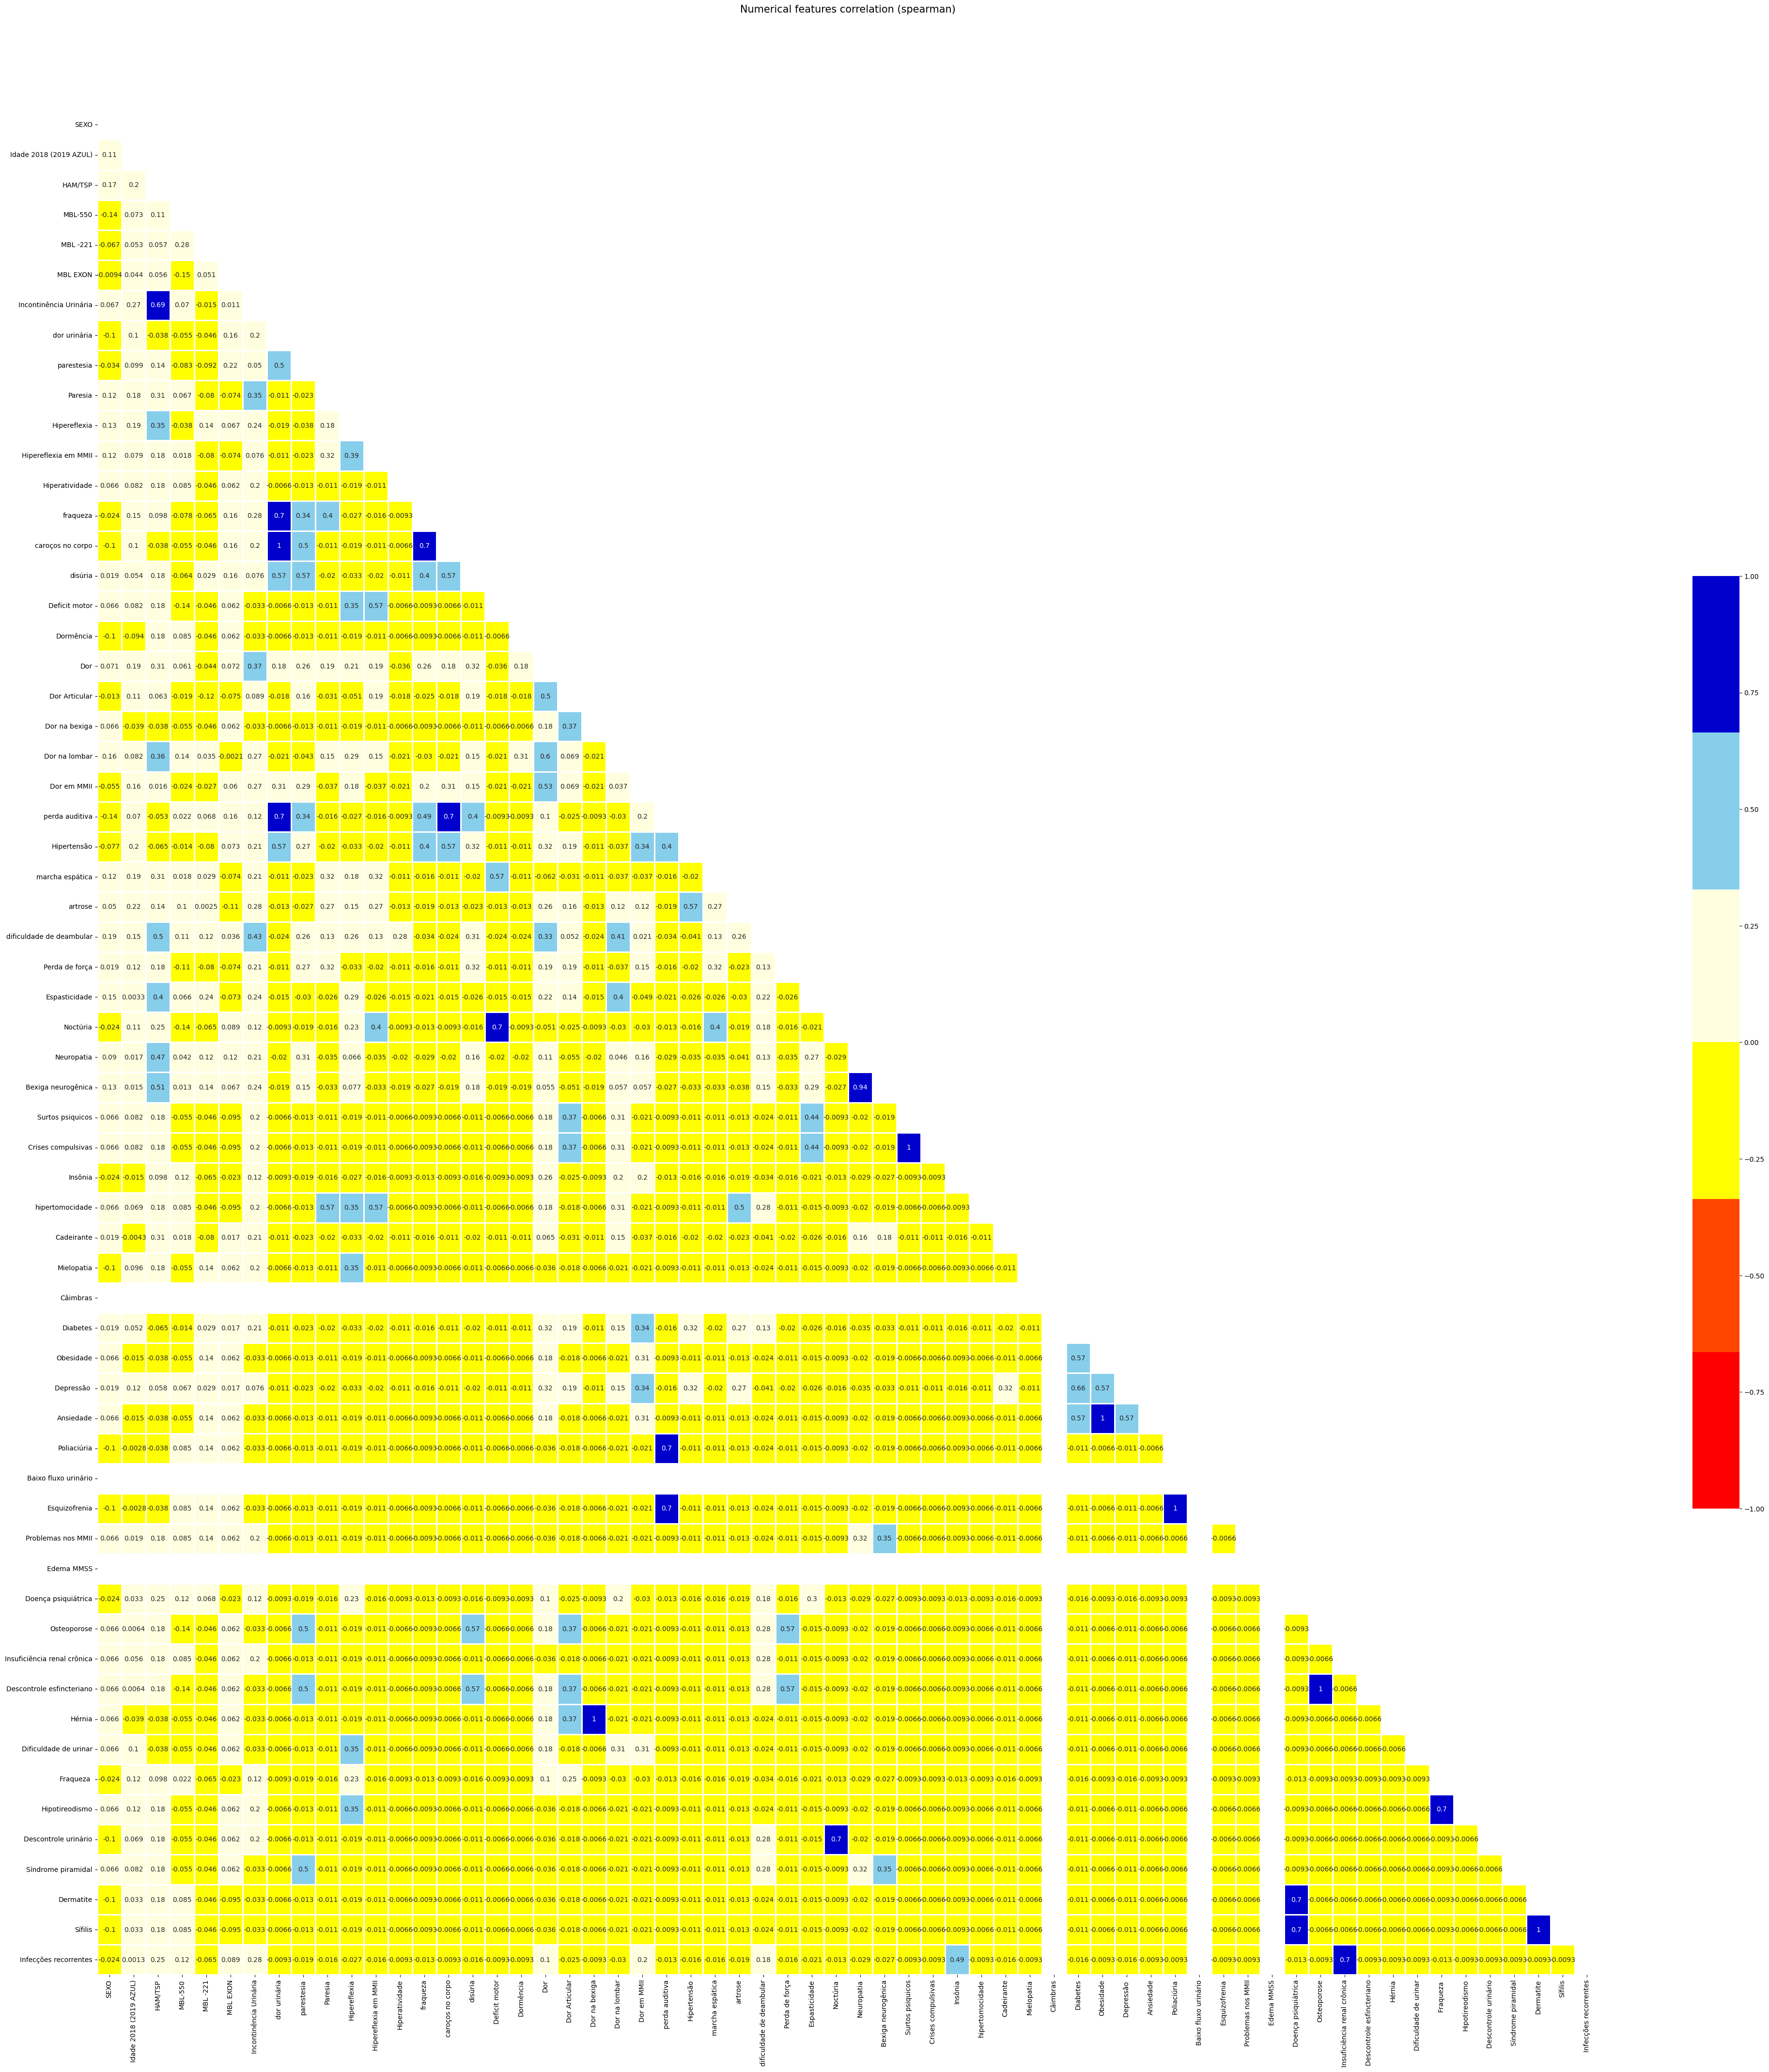

In [12]:
# Correlation
mypal= ['#FF0000', '#FF4500', '#FFFF00','#FFFFE0', '#87CEEB','#0000CD']
metodo_correlacao = "spearman"
df_ = df
corr = df_.corr(method= metodo_correlacao) #method : {'pearson', 'kendall', 'spearman'}
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5})
ax.set_title("Numerical features correlation ("+metodo_correlacao+")", fontsize=15, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/' + 'plot_heatmap_corr_pearson.pdf')

plt.show()

**Cleaning non-numerical data with no predictive value for ML**

In [13]:
# Separate the variables into predictors and target variables (style);
y = df['HAM/TSP'] # Target variables;
x = df.drop('HAM/TSP', axis = 1) # Predict variables, without aim;

**Implementing machine learning models**

In [14]:
# Creating the training and test data sets (using train_test_split):
seed=0
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

Generate the data result in:
> -Accuracy of models

> -ROC curve

In [ ]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()

# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

# Name two ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
    "Neural Net"
]

# Creating the model
for item, nome in zip(classifiers, names):
  item.fit(x_treino, y_treino)

# Calculate the ROC curve
  y_pred = item.predict_proba(x_treino)[:, 1]
  fpr, tpr, _ = roc_curve(y_treino, y_pred)

# Calculate AUC
  roc_auc = auc(fpr, tpr)

# Generate the ROC curve and plot it
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic Curve')
  plt.legend(loc="lower right")
  plt.suptitle('Curva ROC_modelo_'+ nome, fontsize=24)
  plt.savefig ("/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/"+" ROC Curve"+nome+'pdf')

# Generate F1 score and associated metrics report
  pred = item.predict(x_teste)
  pred_proba = item.predict_proba(x_teste)[:, 1]

  # Accuracy
  accuracy = accuracy_score(y_teste, pred)

  # confusion matric, cm
  cm = confusion_matrix(y_teste, pred)

  # recall: TP/(TP+FN)
  recall = cm[1,1]/(cm[1,1] +cm[1,0])

  # precision: TP/(TP+FP)
  precision = cm[1,1]/(cm[1,1] +cm[0,1])

  # F1 score: TP/(TP+FP)
  f1 = 2*recall*precision/(recall + precision)
  f1_metrics = pd.DataFrame(
      [{
       "Nome": item,
        "Accuracy": accuracy*100,
        "Recall": recall,
        "Precision":precision,
        "F1 Score":f1
      }]
)
  # Organization
  data_table = data_table.append(f1_metrics)
data_table = np.round(data_table.reset_index(drop=True), 2)
  # Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
    .style.background_gradient(cmap='coolwarm')\
    .bar(subset=["Recall"], color='#ff355d')\
    .bar(subset=["Precision"], color='lightseagreen')\
    .bar(subset=["F1 Score"], color='gold')
  # Save the generated excel file
styled_table.to_excel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/'+"F1_metrics.xlsx", engine='openpyxl')

# Data prevision randomly:


In [131]:
# Data prevision randomly:
previsoes = item.predict(x_teste[40:45])
previsoes_formatada = ', '.join(str(valor) for valor in previsoes) # concatena lista e converte valores em strings, apresentados separados por ",";
previsoes_formatada = ["Sem mielopatia" if valor == 0 else "HAM/TSP" for valor in previsoes]


print(f"O valor indicado pelo modelo corresponde há: \n{previsoes_formatada} \n")

# Template:
y_teste_lista = y_teste[40:45]
y_teste_lista = ["HAM/TSP" if valor == 1 else "Sem mielopatia" for valor in previsoes]
print(f"O valor real (gabarito), corresponde há:\n{y_teste_lista}")


O valor indicado pelo modelo corresponde há: 
['Sem mielopatia', 'Sem mielopatia', 'Sem mielopatia', 'Sem mielopatia', 'Sem mielopatia'] 

O valor real (gabarito), corresponde há:
['Sem mielopatia', 'Sem mielopatia', 'Sem mielopatia', 'Sem mielopatia', 'Sem mielopatia']


Identificar quais variáveis mais contribuem para o modelo

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm_imp = PermutationImportance(DecisionTreeClassifier, random_state=seed).fit(x_treino, y_treino)
w = eli5.show_weights(perm_imp, feature_names = x_teste.columns.tolist())

result = pd.read_html(w.data)[0]

arquivo_gerado = diretorio_name+"/"+nome_arquivo+"_Importancia_Variaveis.csv"
result.to_csv(arquivo_gerado)

result